In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                             mean_squared_error, mean_absolute_error,
                             r2_score, precision_recall_curve, roc_curve,
                             auc, accuracy_score, precision_score, recall_score, f1_score)
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier

# Set seaborn style
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('../CSV/full_data_flightdelay.csv')

In [3]:
df.shape

(6489062, 26)

In [4]:
df = df.sample(n = 500_000, random_state = 42).reset_index(drop = True)

In [5]:
df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,3,5,0,1500-1559,3,4,27,69,"Midwest Airline, Inc.",11965,...,11,Ronald Reagan Washington National,38.852,-77.037,Eppley Airfield,0.00,0.0,0.0,68.0,4.47
1,9,7,0,2200-2259,5,1,7,128,American Airlines Inc.,6740,...,6,Miami International,25.792,-80.286,NONE,0.00,0.0,0.0,94.0,5.82
2,12,1,0,1900-1959,3,5,15,76,Endeavor Air Inc.,5359,...,5,Raleigh-Durham International,35.875,-78.782,Tampa International,0.00,0.0,0.0,50.0,7.83
3,8,3,0,1700-1759,6,2,22,276,United Air Lines Inc.,11012,...,17,Newark Liberty International,40.696,-74.172,San Francisco International,1.69,0.0,0.0,84.0,4.25
4,9,5,0,0800-0859,2,1,3,76,Mesa Airlines Inc.,1378,...,2,Tulsa International,36.198,-95.890,NONE,0.00,0.0,0.0,95.0,6.26


In [6]:
df.tail()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
499995,9,5,1,0900-0959,2,2,16,76,SkyWest Airlines Inc.,13331,...,11,Detroit Metro Wayne County,42.217,-83.344,Huntsville International-Carl T Jones Field,0.4,0.0,0.0,86.0,9.62
499996,5,2,0,0900-0959,3,2,14,70,Comair Inc.,10452,...,16,Philadelphia International,39.868,-75.249,Norfolk International,0.0,0.0,0.0,74.0,14.54
499997,7,3,0,0700-0759,5,1,11,120,United Air Lines Inc.,4068,...,13,Port Columbus International,39.991,-82.878,NONE,0.0,0.0,0.0,79.0,6.49
499998,7,3,0,0001-0559,8,1,20,142,United Air Lines Inc.,13781,...,24,Seattle International,47.447,-122.306,NONE,0.0,0.0,0.0,78.0,8.50
499999,8,6,1,1000-1059,4,2,26,181,Alaska Airlines Inc.,14049,...,3,Seattle International,47.447,-122.306,Friendship International,0.0,0.0,0.0,75.0,5.59


In [7]:
df.isnull().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

In [8]:

# For columns with numerical data
numerical_cols = ['DISTANCE_GROUP', 'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
                  'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
                  'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
                  'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'PRCP', 'SNOW',
                  'SNWD', 'TMAX', 'AWND']

imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])


In [9]:

imputer = KNNImputer(n_neighbors=5)
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [10]:
categorical_cols = ['CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT']

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\lequa\AppData\Local\Temp\ipykernel_13028\3501040481.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [11]:
for col in categorical_cols:
    df[f'{col}_missing'] = df[col].isnull().astype(int)
    df[col].fillna('Unknown', inplace=True)

C:\Users\lequa\AppData\Local\Temp\ipykernel_13028\2172072324.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)
C:\Users\lequa\AppData\Local\Temp\ipykernel_13028\2172072324.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [12]:
# Ensure MONTH is between 1 and 12
df = df[df['MONTH'].between(1, 12)]

# Ensure DAY_OF_WEEK is between 1 and 7
df = df[df['DAY_OF_WEEK'].between(1, 7)]

In [13]:
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# View duplicate rows
print(df[duplicate_rows])


Number of duplicate rows: 195
        MONTH  DAY_OF_WEEK  DEP_DEL15 DEP_TIME_BLK  DISTANCE_GROUP  \
31164       7            4          0    0001-0559             8.0   
56653       9            7          0    0600-0659             1.0   
80673      10            3          0    0700-0759             3.0   
87419       4            5          0    0600-0659             5.0   
89533       8            4          0    0800-0859             1.0   
...       ...          ...        ...          ...             ...   
492542      5            7          0    0600-0659             1.0   
494277      1            4          0    0800-0859             3.0   
496874      6            2          0    0600-0659             1.0   
499392      5            3          0    0600-0659             2.0   
499493      4            2          0    0600-0659             3.0   

        SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
31164              1.0                11.0            173.0   
566

In [14]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")


Number of duplicate rows after removal: 0


In [15]:
df = df.drop(columns=['LATITUDE', 'LONGITUDE'], errors='ignore')

In [16]:
df.to_json('../CSV/cleaned_flight_data.json', orient='records', lines=True)


In [17]:
df2 = pd.read_json('../CSV/cleaned_flight_data.json', lines=True)


In [18]:
df2.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_NAME_missing,DEPARTING_AIRPORT_missing,PREVIOUS_AIRPORT_missing
0,3,5,0,1500-1559,3,4,27,69,"Midwest Airline, Inc.",11965,...,Ronald Reagan Washington National,Eppley Airfield,0.00,0.0,0.0,68.0,4.47,0,0,0
1,9,7,0,2200-2259,5,1,7,128,American Airlines Inc.,6740,...,Miami International,NONE,0.00,0.0,0.0,94.0,5.82,0,0,0
2,12,1,0,1900-1959,3,5,15,76,Endeavor Air Inc.,5359,...,Raleigh-Durham International,Tampa International,0.00,0.0,0.0,50.0,7.83,0,0,0
3,8,3,0,1700-1759,6,2,22,276,United Air Lines Inc.,11012,...,Newark Liberty International,San Francisco International,1.69,0.0,0.0,84.0,4.25,0,0,0
4,9,5,0,0800-0859,2,1,3,76,Mesa Airlines Inc.,1378,...,Tulsa International,NONE,0.00,0.0,0.0,95.0,6.26,0,0,0


In [19]:
df2.tail()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_NAME_missing,DEPARTING_AIRPORT_missing,PREVIOUS_AIRPORT_missing
499800,9,5,1,0900-0959,2,2,16,76,SkyWest Airlines Inc.,13331,...,Detroit Metro Wayne County,Huntsville International-Carl T Jones Field,0.4,0.0,0.0,86.0,9.62,0,0,0
499801,5,2,0,0900-0959,3,2,14,70,Comair Inc.,10452,...,Philadelphia International,Norfolk International,0.0,0.0,0.0,74.0,14.54,0,0,0
499802,7,3,0,0700-0759,5,1,11,120,United Air Lines Inc.,4068,...,Port Columbus International,NONE,0.0,0.0,0.0,79.0,6.49,0,0,0
499803,7,3,0,0001-0559,8,1,20,142,United Air Lines Inc.,13781,...,Seattle International,NONE,0.0,0.0,0.0,78.0,8.50,0,0,0
499804,8,6,1,1000-1059,4,2,26,181,Alaska Airlines Inc.,14049,...,Seattle International,Friendship International,0.0,0.0,0.0,75.0,5.59,0,0,0


In [20]:
df2.describe()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,GROUND_SERV_PER_PASS,PLANE_AGE,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_NAME_missing,DEPARTING_AIRPORT_missing,PREVIOUS_AIRPORT_missing
count,499805.000000,499805.000000,499805.000000,499805.000000,499805.000000,499805.000000,499805.000000,499805.000000,499805.000000,499805.000000,...,499805.000000,499805.000000,499805.000000,499805.000000,499805.000000,499805.000000,499805.000000,499805.0,499805.0,499805.0
mean,6.611877,3.934196,0.190498,3.817215,3.045458,27.894523,133.732148,12701.647943,62929.468795,3467.234349,...,0.000136,11.535243,0.104140,0.031059,0.092614,71.467376,8.340689,0.0,0.0,0.0
std,3.399407,1.994748,0.392695,2.380521,1.760379,21.522540,46.426433,8847.513334,34392.116445,4260.036071,...,0.000047,6.933009,0.341125,0.311782,0.729767,18.341244,3.610857,0.0,0.0,0.0
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,44.000000,1100.000000,5582.000000,1.000000,...,0.000007,0.000000,0.000000,0.000000,0.000000,-10.000000,0.000000,0.0,0.0,0.0
25%,4.000000,2.000000,0.000000,2.000000,2.000000,11.000000,90.000000,5353.000000,24966.000000,652.000000,...,0.000099,5.000000,0.000000,0.000000,0.000000,59.000000,5.820000,0.0,0.0,0.0
50%,7.000000,4.000000,0.000000,3.000000,3.000000,23.000000,143.000000,11587.000000,70878.000000,2257.000000,...,0.000125,12.000000,0.000000,0.000000,0.000000,74.000000,7.830000,0.0,0.0,0.0
75%,10.000000,6.000000,0.000000,5.000000,4.000000,39.000000,172.000000,17615.000000,86312.000000,4834.000000,...,0.000177,17.000000,0.020000,0.000000,0.000000,86.000000,10.290000,0.0,0.0,0.0
max,12.000000,7.000000,1.000000,11.000000,15.000000,109.000000,337.000000,35256.000000,117728.000000,21837.000000,...,0.000229,32.000000,11.630000,17.200000,25.200000,115.000000,33.780000,0.0,0.0,0.0


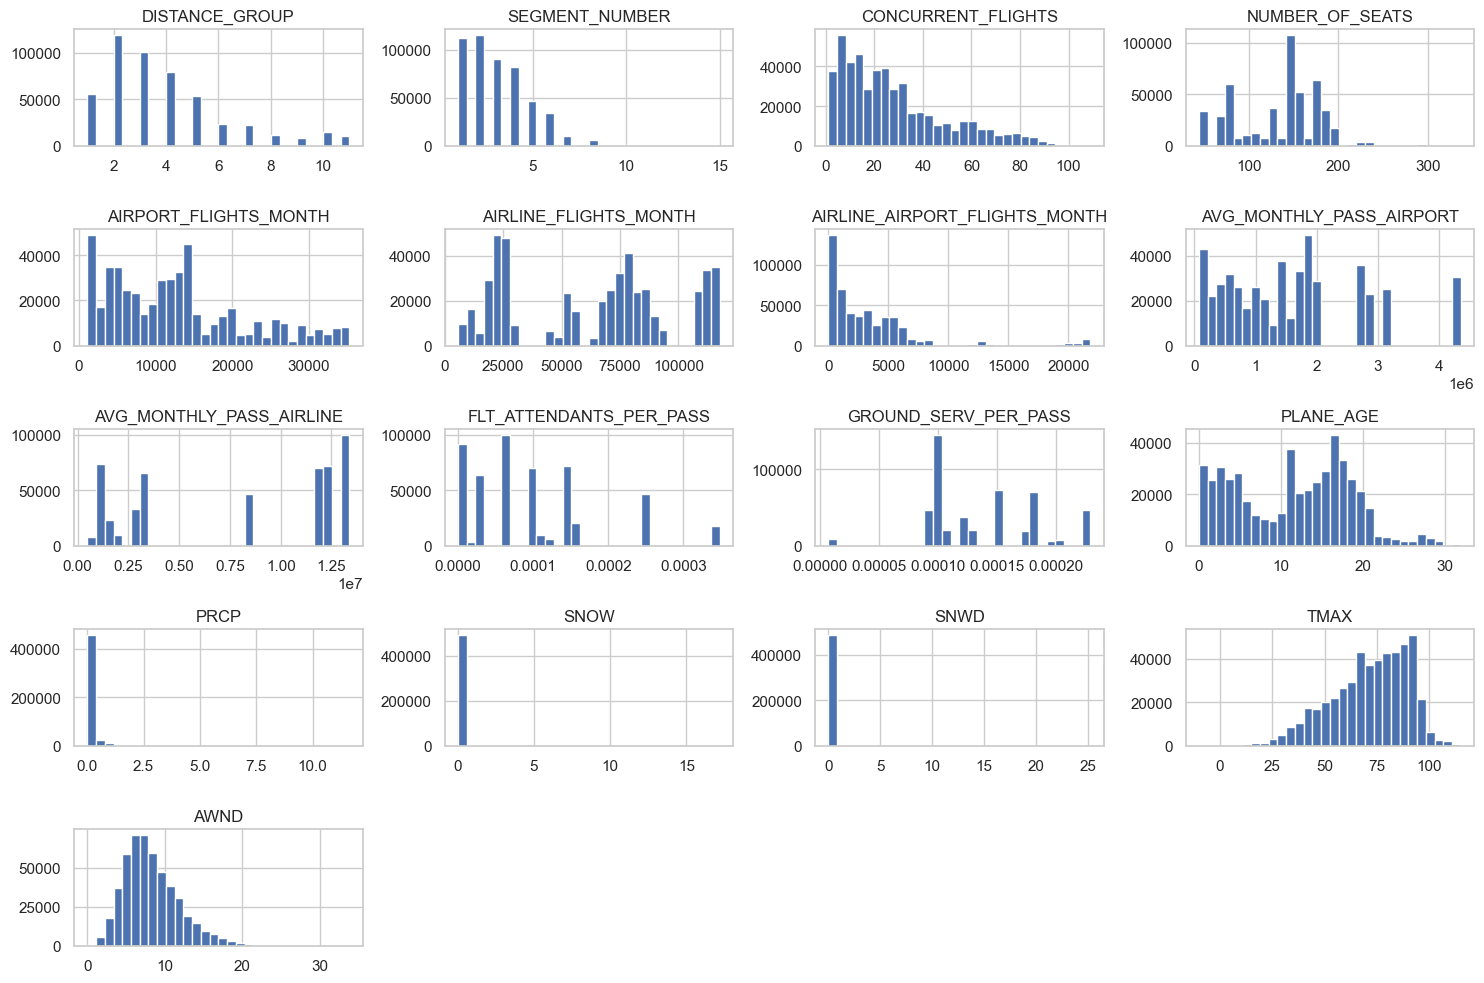

In [21]:


df2[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

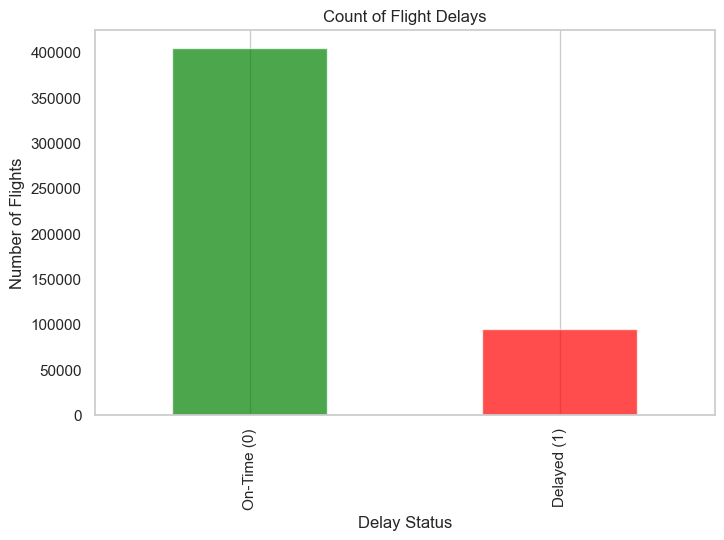

In [22]:

delay_counts = df2['DEP_DEL15'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
delay_counts.plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Count of Flight Delays')
plt.xlabel('Delay Status')
plt.ylabel('Number of Flights')
plt.xticks(ticks=[0, 1], labels=['On-Time (0)', 'Delayed (1)'])
plt.grid(axis='y')
plt.show()

C:\Users\lequa\AppData\Local\Temp\ipykernel_13028\28103645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CARRIER_NAME', data=df2, palette='pastel')


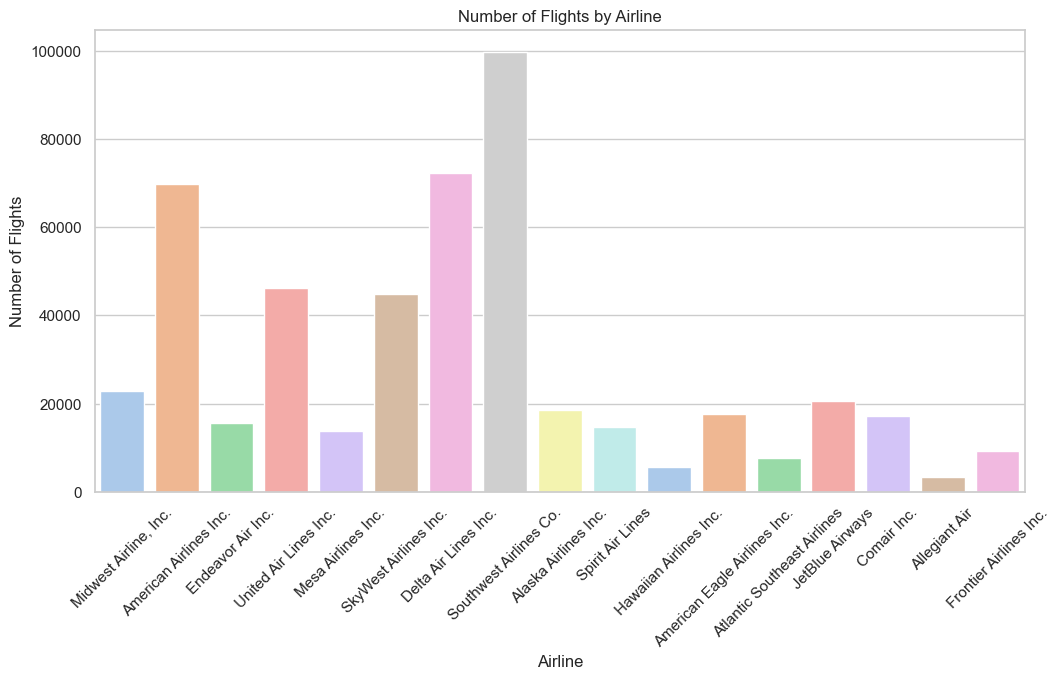

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(x='CARRIER_NAME', data=df2, palette='pastel')
plt.title('Number of Flights by Airline')
plt.xticks(rotation=45)
plt.ylabel('Number of Flights')
plt.xlabel('Airline')
plt.show()

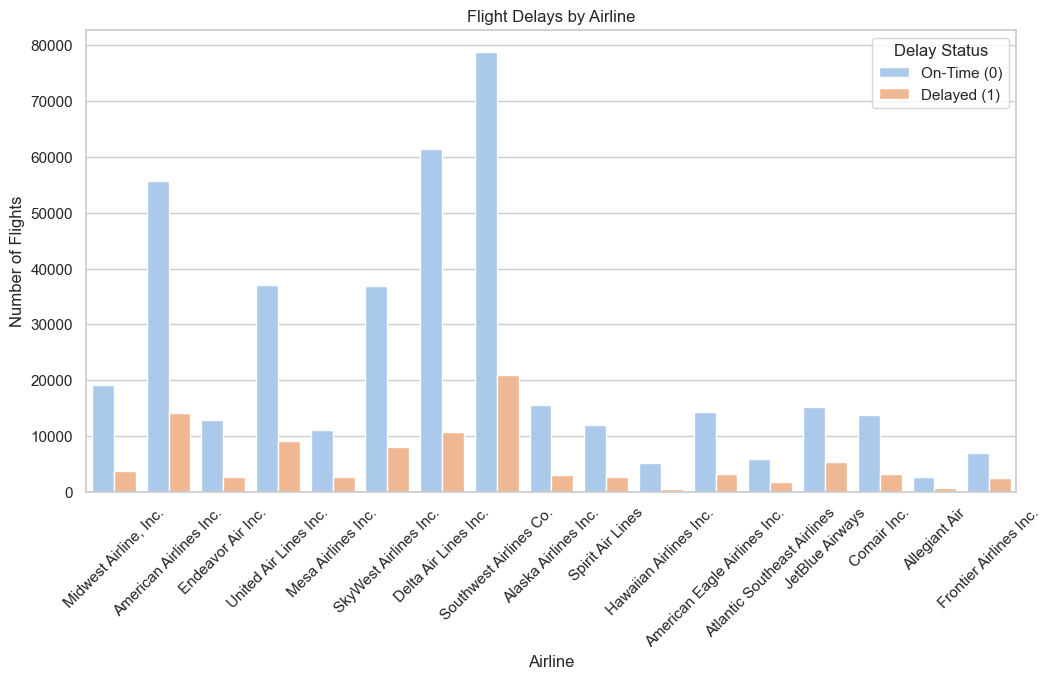

In [24]:

plt.figure(figsize=(12, 6))
sns.countplot(x='CARRIER_NAME', hue='DEP_DEL15', data=df2, palette='pastel')
plt.title('Flight Delays by Airline')
plt.xticks(rotation=45)
plt.ylabel('Number of Flights')
plt.xlabel('Airline')
plt.legend(title='Delay Status', labels=['On-Time (0)', 'Delayed (1)'])
plt.show()

C:\Users\lequa\AppData\Local\Temp\ipykernel_13028\984700288.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DAY_OF_WEEK', y='DEP_DEL15', data=avg_delay_by_day, palette='viridis')


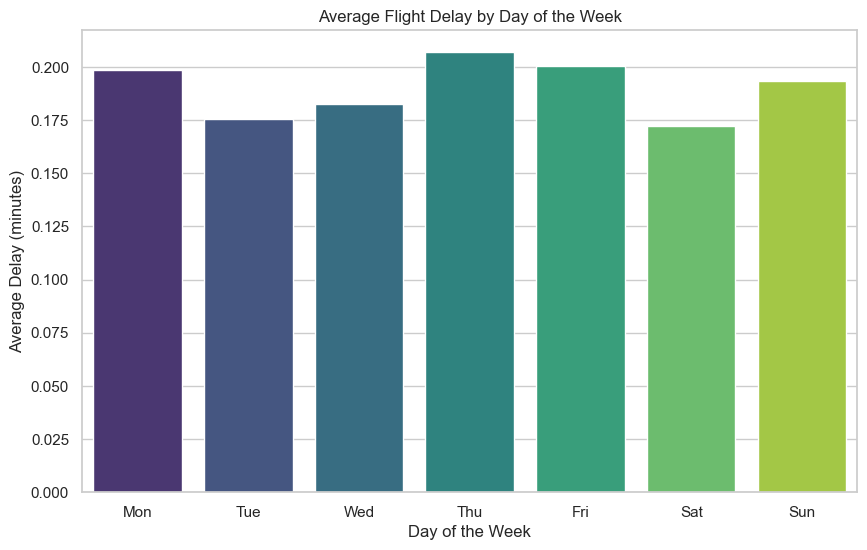

In [25]:
avg_delay_by_day = df2.groupby('DAY_OF_WEEK')['DEP_DEL15'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='DAY_OF_WEEK', y='DEP_DEL15', data=avg_delay_by_day, palette='viridis')
plt.title('Average Flight Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


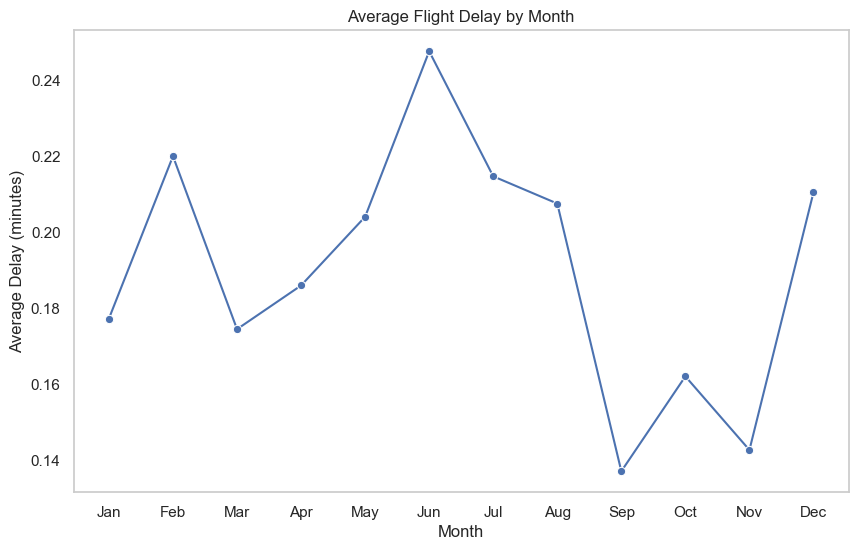

In [26]:
avg_delay_by_month = df2.groupby('MONTH')['DEP_DEL15'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='MONTH', y='DEP_DEL15', data=avg_delay_by_month, marker='o')
plt.title('Average Flight Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()


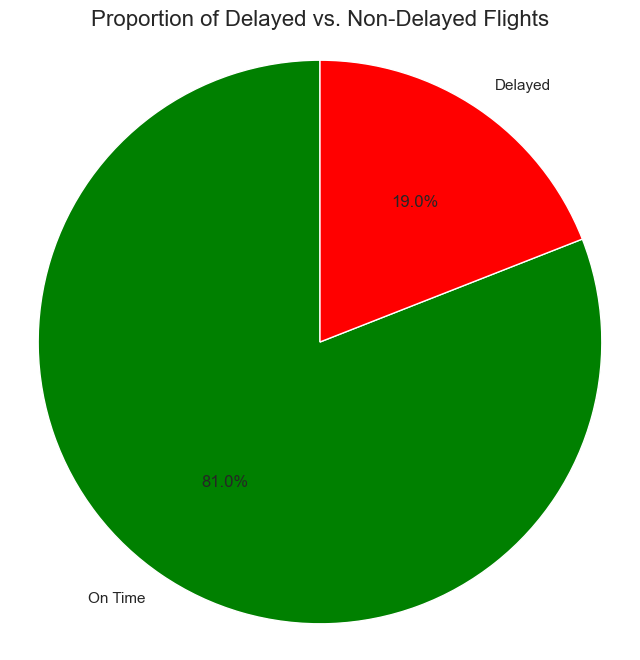

In [27]:
plt.figure(figsize=(8, 8))
plt.pie(df2['DEP_DEL15'].value_counts(), labels=['On Time', 'Delayed'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])

plt.title('Proportion of Delayed vs. Non-Delayed Flights', fontsize=16)
plt.axis('equal')

plt.show()

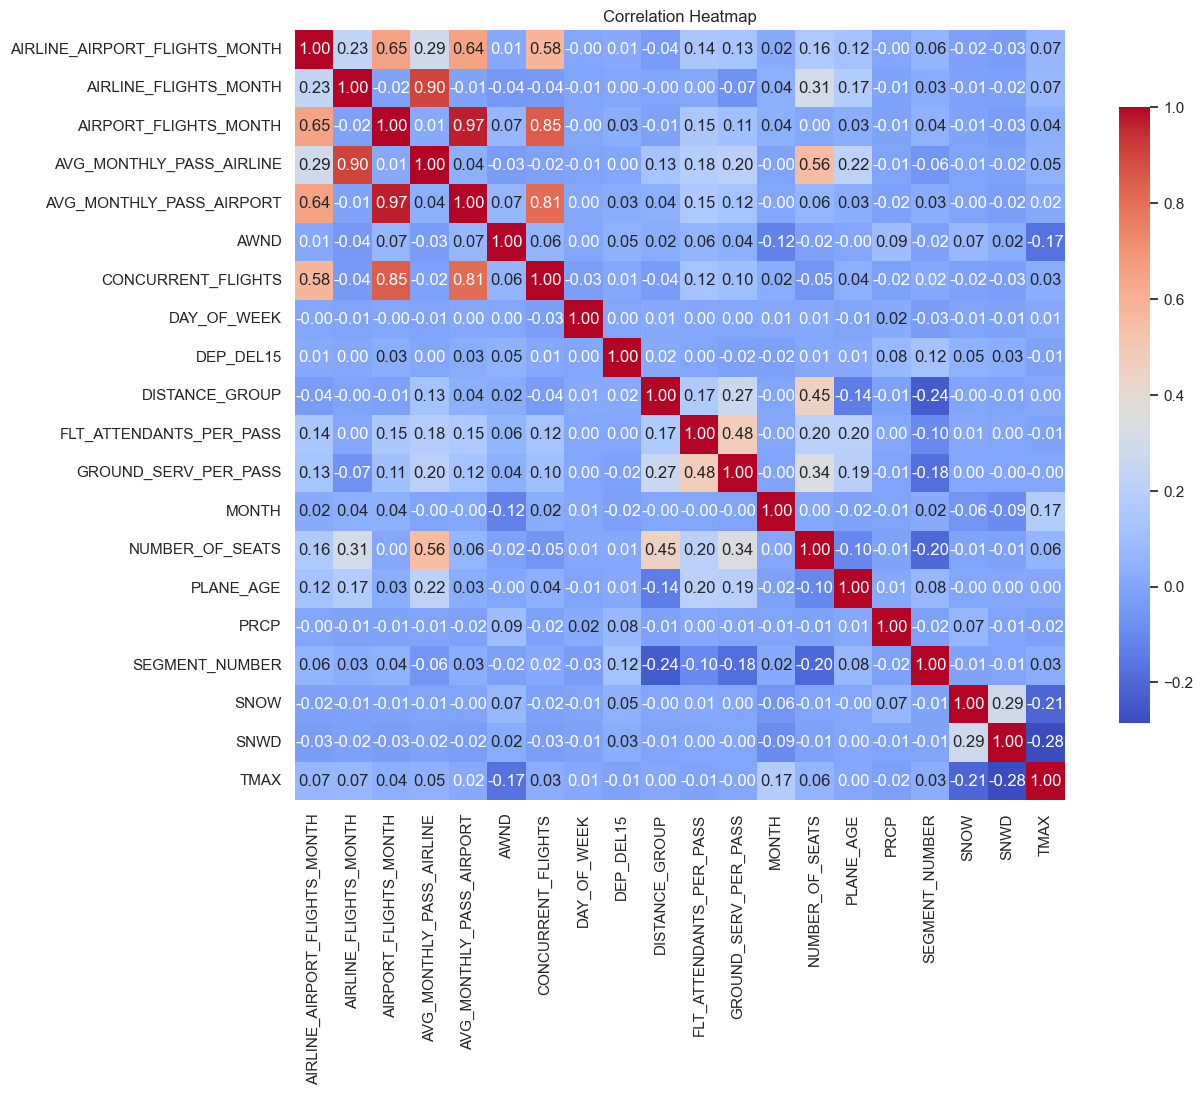

In [28]:
excluded_cols = ['CARRIER_NAME_missing', 'DEPARTING_AIRPORT_missing', 'PREVIOUS_AIRPORT_missing'] 
numeric_cols = df2.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_cols)

# Calculate the correlation matrix with only numeric columns
correlation_matrix = df2[numeric_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Title and labels
plt.title('Correlation Heatmap')
plt.show()

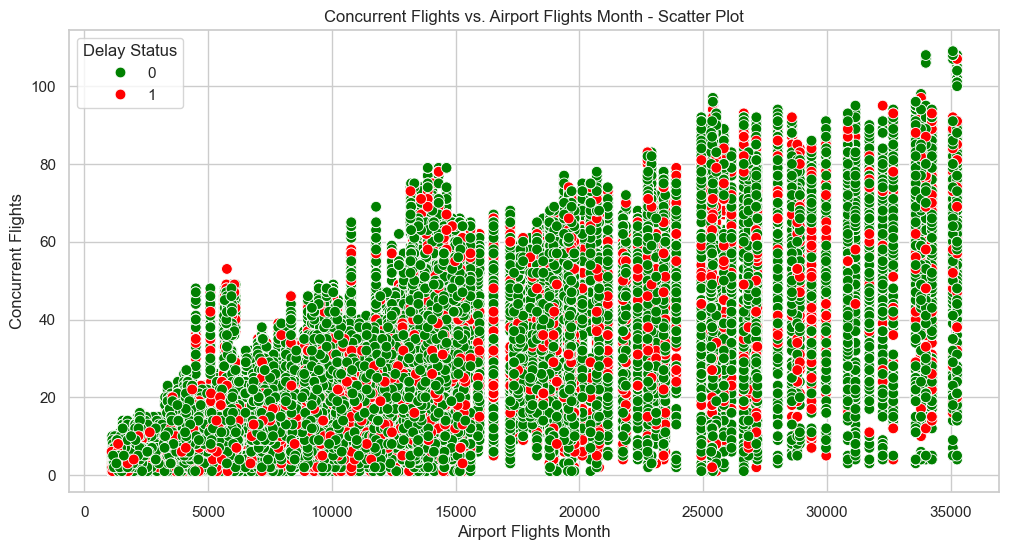

In [29]:
plt.figure(figsize=(12, 6))
sns.scatterplot(y = df2.CONCURRENT_FLIGHTS, x = df2.AIRPORT_FLIGHTS_MONTH, hue = df2.DEP_DEL15, s = 60, palette={0: 'green', 1: 'red'})
plt.title('Concurrent Flights vs. Airport Flights Month - Scatter Plot')
plt.xlabel('Airport Flights Month')
plt.ylabel('Concurrent Flights')
plt.legend(title='Delay Status')
plt.show()

In [30]:
X = df2[["AWND", "PRCP", "SNOW", "SNWD", "SEGMENT_NUMBER", "DAY_OF_WEEK"]].to_numpy()
y = df2["DEP_DEL15"].to_numpy()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predictions
y_pred_linear = lin_model.predict(X_test)

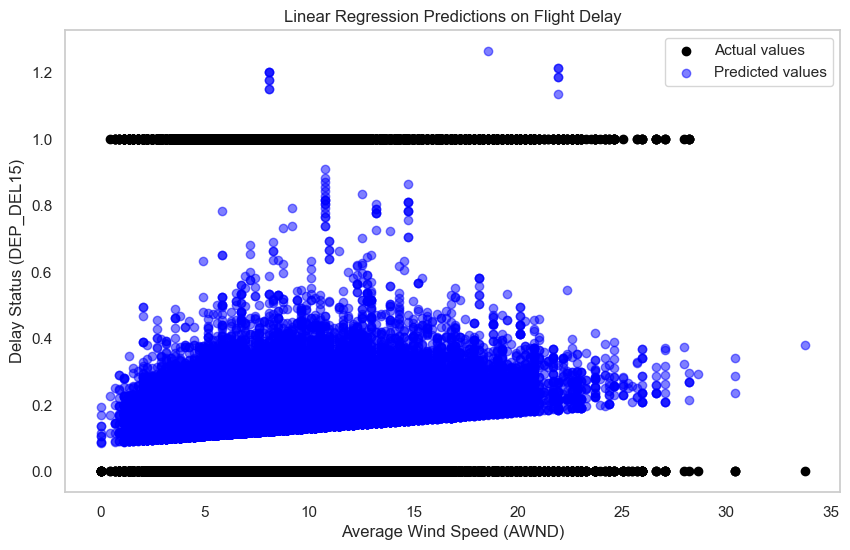

In [32]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='black', label='Actual values')  # X_test[:, 0] for AWND
plt.scatter(X_test[:, 0], y_pred_linear, color='blue', label='Predicted values', alpha=0.5)
plt.xlabel('Average Wind Speed (AWND)')
plt.ylabel('Delay Status (DEP_DEL15)')
plt.title('Linear Regression Predictions on Flight Delay')
plt.legend()
plt.grid()
plt.show()


In [33]:
mse = mean_squared_error(y_test, y_pred_linear)
mae = mean_absolute_error(y_test, y_pred_linear)
rmse = mean_squared_error(y_test, y_pred_linear, squared=False)  # or use np.sqrt(mse)
r2 = r2_score(y_test, y_pred_linear)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Squared Error (MSE): 0.1497
Mean Absolute Error (MAE): 0.3005
Root Mean Squared Error (RMSE): 0.3869
R² Score: 0.0251


c:\Users\lequa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
X_cluster = df2[["PRCP", "AWND", "SNOW", "SNWD", "SEGMENT_NUMBER", "DAY_OF_WEEK"]].to_numpy()

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

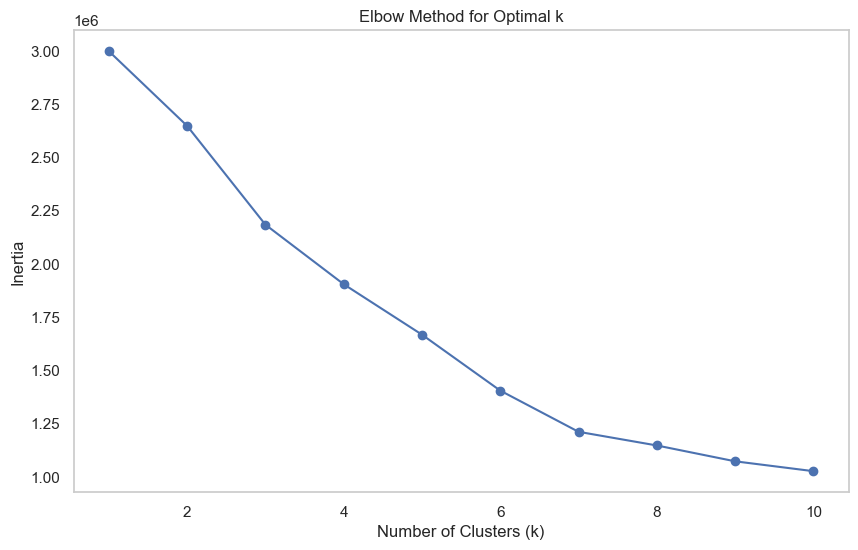

In [35]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()


In [36]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(X_scaled)

# Get the cluster predictions
all_predictions = model.predict(X_scaled)

# Add the cluster predictions back to the original dataframe
df2['Cluster'] = all_predictions

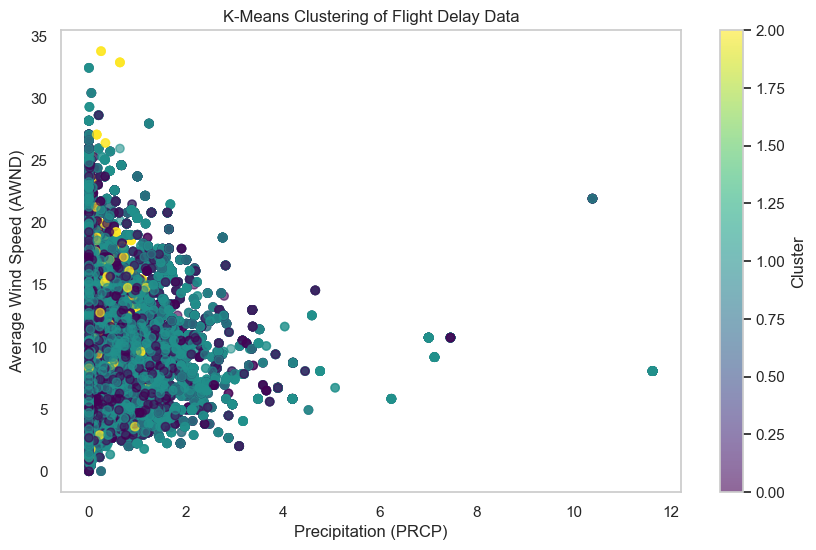

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(df2['PRCP'], df2['AWND'], c=df2['Cluster'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering of Flight Delay Data')
plt.xlabel('Precipitation (PRCP)')
plt.ylabel('Average Wind Speed (AWND)')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [38]:
# Example input for testing
test_data = np.array([[0.1, 0.5, 1, 0, 2, 1]])  # Example values

# Standardizing the test data
test_data_scaled = scaler.transform(test_data)

# Predicting the cluster for the test data
predicted_label = model.predict(test_data_scaled)
print(f'The predicted cluster for the test data point is: {predicted_label[0]}')


The predicted cluster for the test data point is: 1


In [39]:
# Example input for testing
test_data = np.array([[0.1, 0.5, 1, 0, 2, 1]])  # Example values

# Standardizing the test data

# Predicting the cluster for the test data
predicted_label = model.predict(test_data)
print(f'The predicted cluster for the test data point is: {predicted_label[0]}')


The predicted cluster for the test data point is: 0


In [40]:
X = df2[["PRCP", "AWND", "SNOW", "SNWD", "SEGMENT_NUMBER", "DAY_OF_WEEK"]].to_numpy()
y = df2["DEP_DEL15"].to_numpy()  # Assuming DEP_DEL15 is your target variable

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [43]:

# Assuming you have your predictions and true labels
y_pred = log_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.81
Precision: 0.43
Recall: 0.01
F1 Score: 0.02

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89     81029
           1       0.43      0.01      0.02     18932

    accuracy                           0.81     99961
   macro avg       0.62      0.50      0.46     99961
weighted avg       0.74      0.81      0.73     99961

Confusion Matrix:
 [[80827   202]
 [18780   152]]


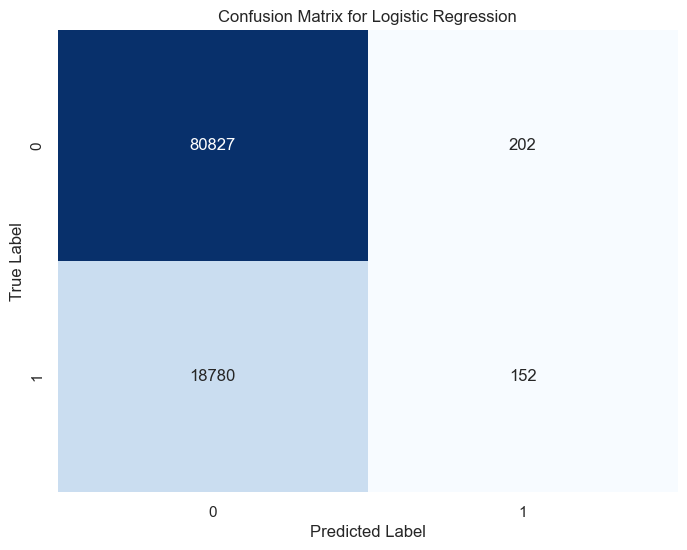

In [44]:

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


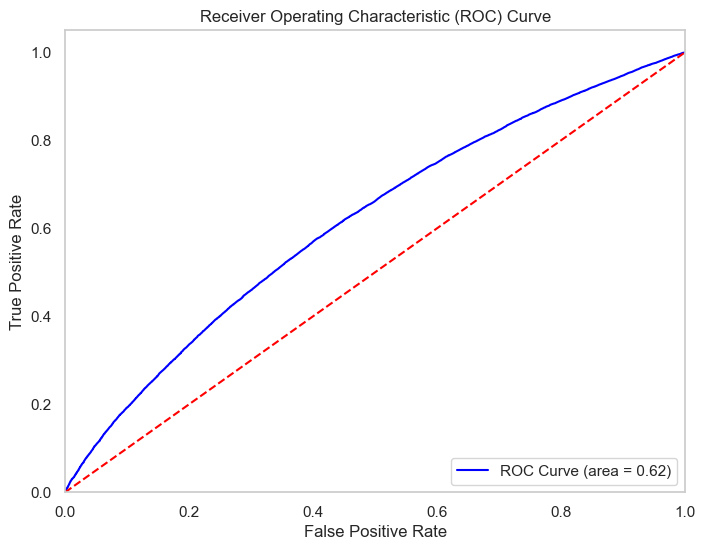

In [45]:

# Get the predicted probabilities for the positive class
y_probs = log_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


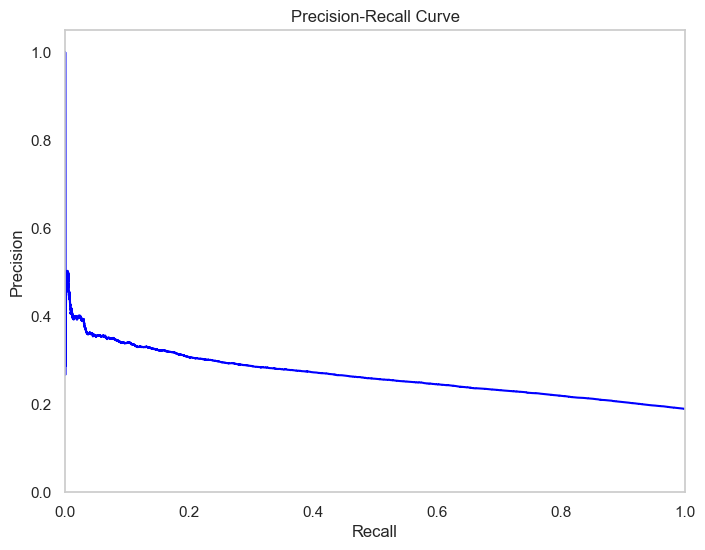

In [46]:

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plotting the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.show()


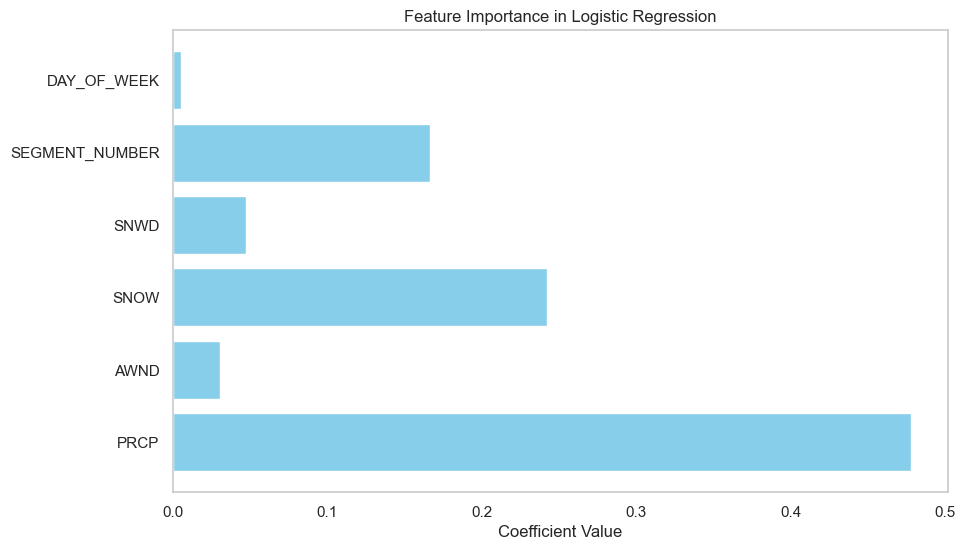

In [47]:
# Get feature names from the DataFrame
feature_names = df2[["PRCP", "AWND", "SNOW", "SNWD", "SEGMENT_NUMBER", "DAY_OF_WEEK"]].columns

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, log_model.coef_[0], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.grid()
plt.show()


In [48]:
# Feature selection
X = df2[["PRCP", "AWND", "SNOW", "SNWD", "SEGMENT_NUMBER", "DAY_OF_WEEK"]].to_numpy()
y = df2["DEP_DEL15"].to_numpy()  # Your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [50]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)


In [51]:
# Print evaluation metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89     81029
           1       0.44      0.11      0.17     18932

    accuracy                           0.80     99961
   macro avg       0.63      0.54      0.53     99961
weighted avg       0.75      0.80      0.75     99961

Confusion Matrix:
 [[78417  2612]
 [16898  2034]]


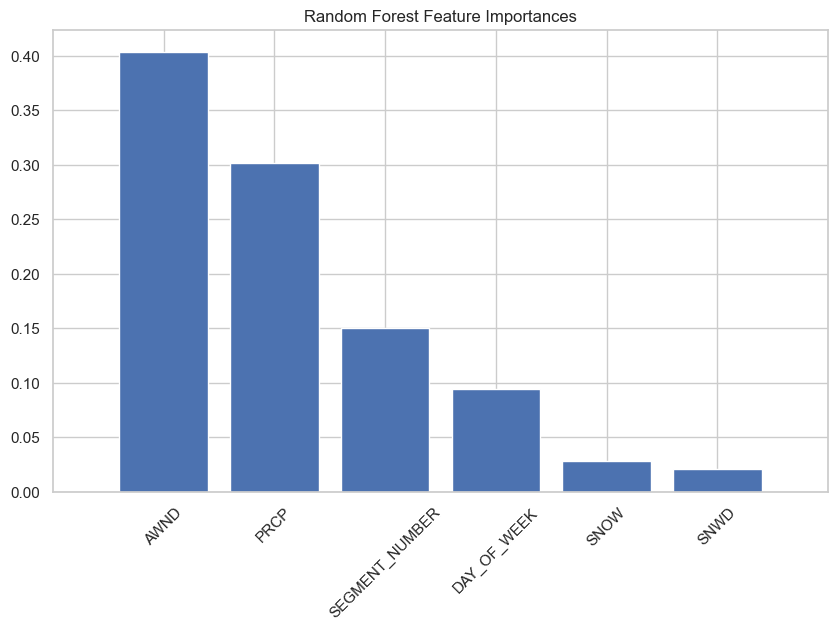

In [52]:
# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(["PRCP", "AWND", "SNOW", "SNWD", "SEGMENT_NUMBER", "DAY_OF_WEEK"])[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()


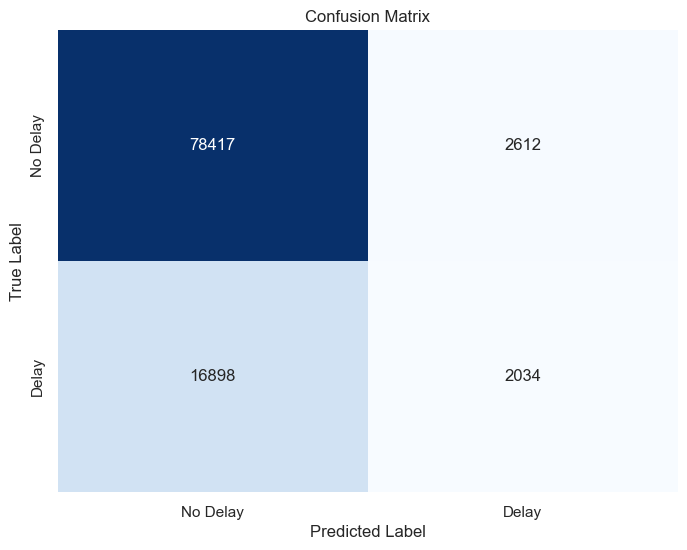

In [53]:

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


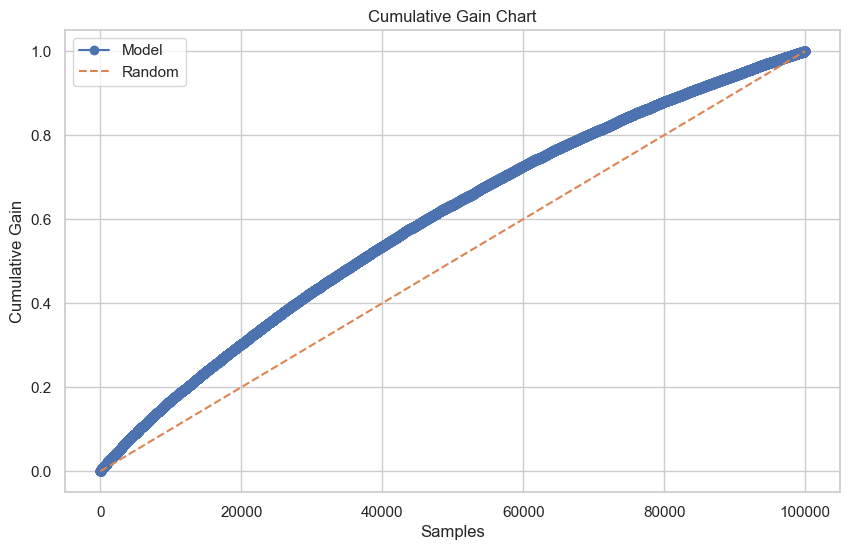

In [54]:
# Sort probabilities and actual values
sorted_indices = np.argsort(y_probs)[::-1]
sorted_y_test = y_test[sorted_indices]

# Calculate cumulative gains
cumulative_gains = np.cumsum(sorted_y_test) / np.sum(sorted_y_test)

# Plot cumulative gains
plt.figure(figsize=(10, 6))
plt.plot(cumulative_gains, marker='o', label='Model')
plt.plot([0, len(y_test)], [0, 1], linestyle='--', label='Random')
plt.xlabel('Samples')
plt.ylabel('Cumulative Gain')
plt.title('Cumulative Gain Chart')
plt.legend()
plt.show()
